# Plot of the radial component of the magnetic field $B_r(\frac{r}{r_l})$ and $r \cdot B_r(\frac{r}{r_l})$

$\mathbf{\text{According Petri 2013, the expression of the radiale component is given by the eq.(1a):  }}$<br>
\begin{align*}
B_r &= {\beta}_{v}^2 \cdot B_L \cdot \frac{r_L^2}{r^2} \cdot \tanh(\frac{\Psi_s}{\Delta}) &( 1a)\\
&=  {\beta}_{v}^2 \cdot B_L \cdot \frac{1}{\frac{r^2}{r_L^2}} \cdot \tanh(\frac{\Psi_s}{\Delta}) \\
\end{align*}<br>

**Suppose** $ z = \frac{r}{r_L}$, __then__ ,   $ B_r = {\beta}_{v}^2 \cdot B_L \cdot \frac{1}{z^2}  \cdot \tanh(\frac{\Psi_s}{\Delta}) \\ $

The expression of $ \psi_s $ is given by the **Eq.(2) in Petri 2013**:
\begin{equation}
\psi_s = \cos(\upsilon) \cdot \cos(\chi) + \sin(\upsilon) \cdot \sin(\chi) \cos(\varphi - \Omega \cdot (t -\frac{r}{\beta_v \cdot c}) )
\end{equation}

Where $\beta_v = \frac{v}{c}$ , $\Omega = \frac{c}{r_L} $ and $ t = 0$

\begin{align*}
\psi_s &=  \cos(\upsilon) \cdot \cos(\chi) + \sin(\upsilon) \cdot \sin(\chi) \cos(\varphi - \frac{c}{r_L} \cdot (0 -\frac{r}{\frac{v}{c} \cdot c} ) \\
&= \cos(\upsilon) \cdot \cos(\chi) + \sin(\upsilon) \cdot \sin(\chi) \cos(\varphi + \frac{c}{v} \cdot \frac{r}{r_L}) \\
&= \cos(\upsilon) \cdot \cos(\chi) + \sin(\upsilon) \cdot \sin(\chi) \cos(\varphi + \frac{1}{\frac{v}{c}} \cdot z) \\
&= \cos(\upsilon) \cdot \cos(\chi) + \sin(\upsilon) \cdot \sin(\chi) \cos(\varphi + \frac{1}{\beta_v} \cdot z) \\
\Rightarrow \psi_s = \cos(\upsilon) \cdot \cos(\chi) + \sin(\upsilon) \cdot \sin(\chi) \cos(\varphi + \frac{z}{\beta_v})
\end{align*}
**According special relativity**  $ \gamma_v = \frac{1}{\sqrt{1 - \beta_v^2}} $
\begin{align*}
\gamma_v &= \frac{1}{\sqrt{1 - \beta_v^2}} \\
\gamma_v^2 &= \frac{1}{1 - \beta_v^2} \\
\gamma_v^2 \cdot (1 - \beta_v^2) &= 1 \\
\gamma_v^2 - \gamma_v^2 \cdot \beta_v^2 &= 1 \\
\gamma_v^2 \cdot \beta_v^2 &= \gamma_v^2 - 1 \\
\beta_v^2 &= \frac{\gamma_v^2 - 1}{\gamma_v^2} \\
\beta_v &= \sqrt{\frac{\gamma_v^2 - 1}{\gamma_v^2}} \\
\beta_v &= \frac{\sqrt{\gamma_v^2 - 1}}{\gamma_v}
\end{align*} <br>

$ \Rightarrow \beta_v = \frac{\sqrt{\gamma_v^2 - 1}}{\gamma_v} $<br><br>
\begin{align*}
\Omega &= \frac{c}{r_L} = 2 \cdot \pi \cdot f \\
2 \pi f &= \frac{c}{r_L} \\
r_L &= \frac{c}{2 \pi f}
\end{align*} <br>
$\Rightarrow r_L = \frac{c}{2 \pi f}$ <br><br>
$ \Rightarrow B_r = {\beta}_{v}^2 \cdot B_L \cdot \frac{1}{z^2}  \cdot \tanh(\frac{\psi_s}{\Delta}) $ <br>


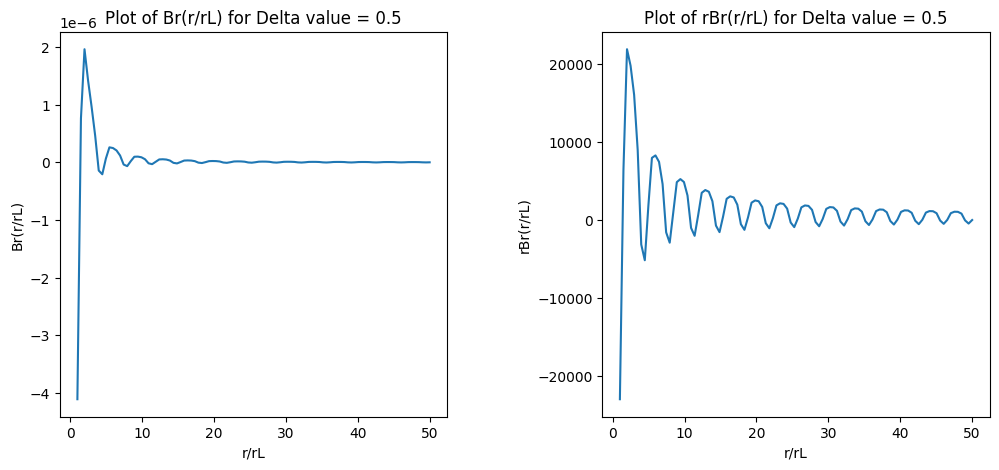

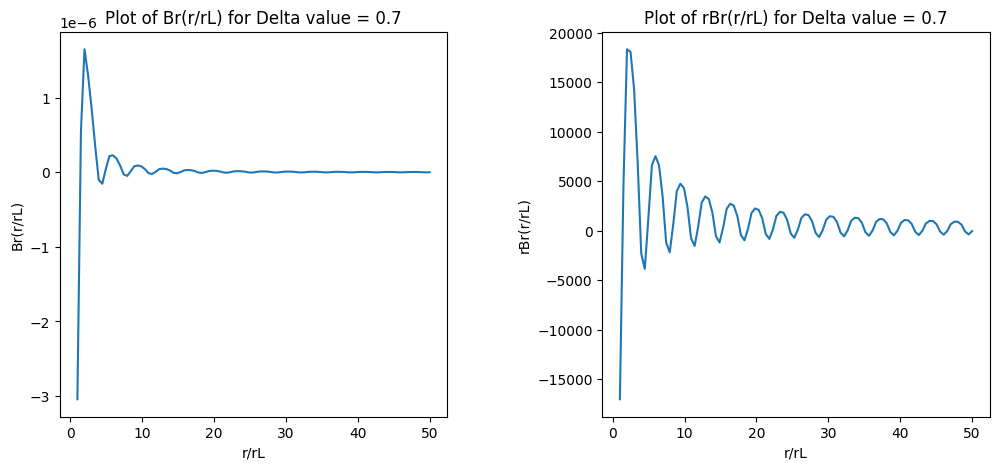

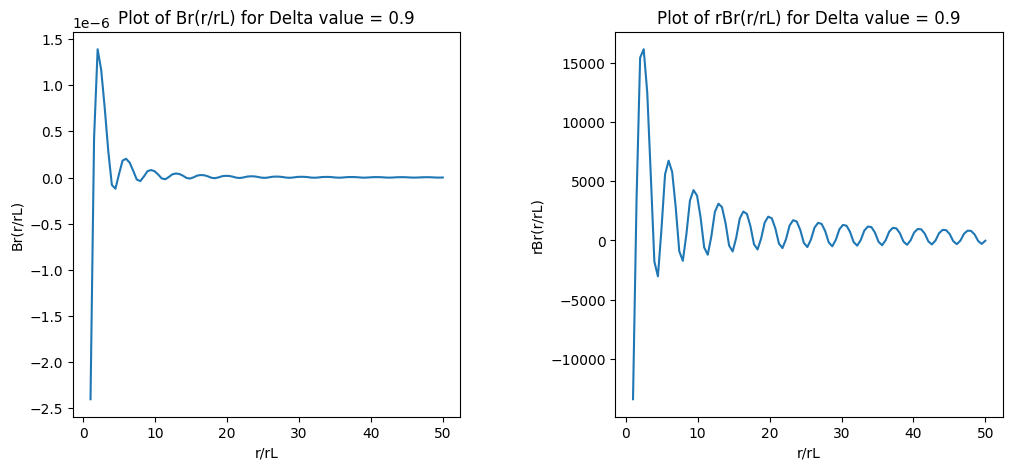

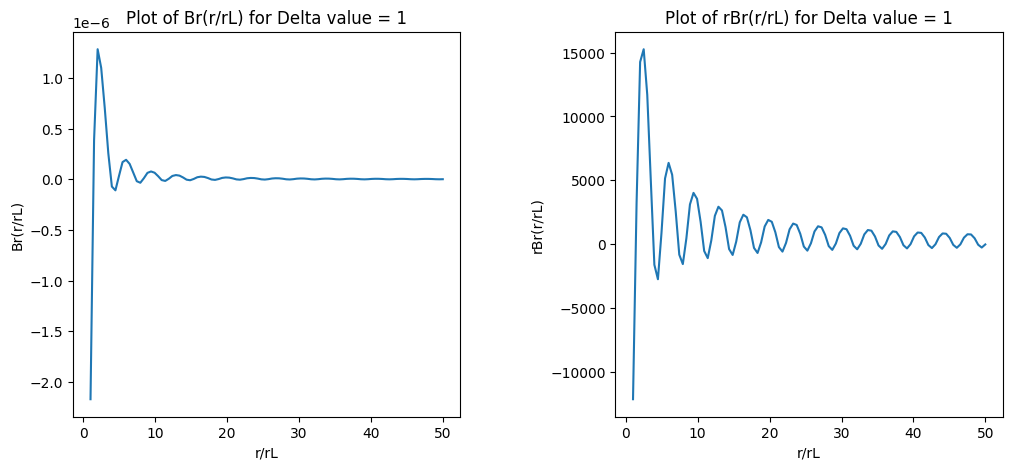

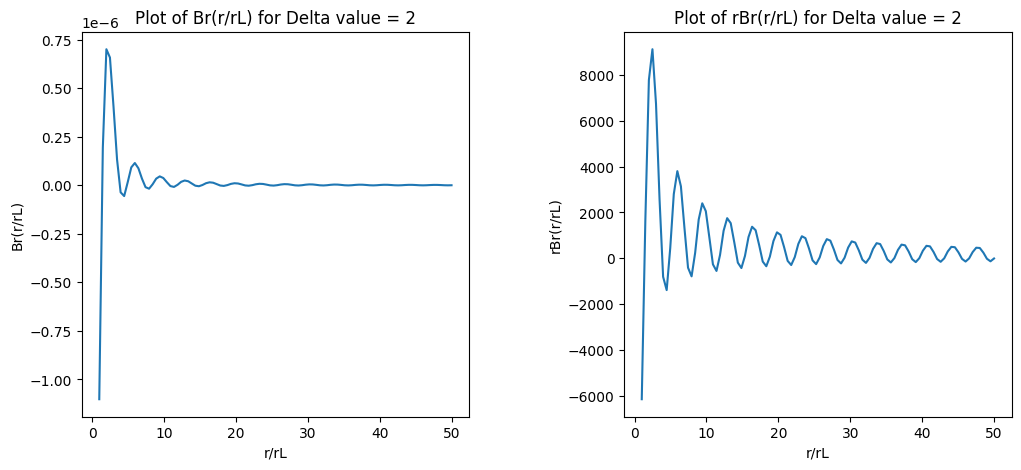

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_to_tesla(gauss):
    """
    Convert Gauss to Tesla.

    Parameters:
        gauss : Value in Gauss.

    Returns:
        Value converted to Tesla.
    """
    return gauss * 1e-4

def degrees_to_radians(degrees):
    """
    Convert degrees to radians.

    Parameters:
        degrees: Value in degrees.

    Returns:
        Value converted to radians.
    """
    return degrees * np.pi / 180

def plot_data(z, Br, rBr, delta):
    """
    Plot Br and rBr for a given Delta value.

    Parameters:
        z: Array of z values.
        Br: Array of radial magnetic field values.
        rBr: Array of r * Br values.
        delta: Delta value.
    """
    fig, axs = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'hspace': 0.6, 'wspace': 0.4})

    axs[0].plot(z, Br)
    axs[0].set_title(f"Plot of Br(r/rL) for Delta value = {delta}")
    axs[0].set_xlabel("r/rL")
    axs[0].set_ylabel("Br(r/rL)")

    axs[1].plot(z, rBr)
    axs[1].set_title(f"Plot of rBr(r/rL) for Delta value = {delta}")
    axs[1].set_xlabel("r/rL")
    axs[1].set_ylabel("rBr(r/rL)");

# Constants
Omega = 2 * np.pi * 0.008538220
rL = 2.99792458e+08 / Omega
Bv = np.sqrt(1.2**2 - 1) / 1.2
BL_G = 0.3
BL_T = gauss_to_tesla(BL_G)
Khi_d = 60
Khi_r = degrees_to_radians(Khi_d)
phi = np.pi / 2
theta = np.pi / 4
r = np.linspace(rL, 50*rL, 100)
z = r / rL
psi = np.cos(theta) * np.cos(Khi_r) + np.sin(theta) * np.sin(Khi_r) * np.cos(phi + z / Bv)

# Delta values
delta_values = [0.5, 0.7, 0.9, 1, 2]

# Plot for each Delta value
for Delta in delta_values:
    Br = Bv**2 * BL_T * 1 / z**2 * np.tanh(psi / Delta)
    rBr = r * Br
    plot_data(z, Br, rBr, Delta)
